In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
# build a logistic regression model to predict whether a student gets admitted into a university

# 读取数据
data = np.loadtxt(os.getcwd()+'/ex2data1.txt', delimiter=',')

# 分离正负数据(eg. : [34.62365962451697,78.0246928153624,0])
neg = data[:,2] == 0
pos = data[:,2] == 1

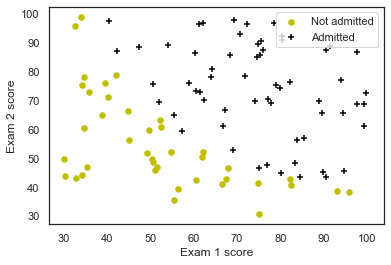

In [3]:
# 1.1 Visualizing the data
plt.scatter(data[neg][:,0], data[neg][:,1], s=20, c='y', marker='o', linewidths=2, label='Not admitted')
plt.scatter(data[pos][:,0], data[pos][:,1], s=30, c='k', marker='+', linewidths=2, label='Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc=1);

In [4]:
# 1.2.1 Warmup exercise: sigmoid function

def getSigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [5]:
# 1.2.2 Cost function and gradient

def getCost(theta, X, y):
    m = y.size
    print(theta)
    h = getSigmoid(X.dot(theta))
    J = (-1 / m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
    
    if np.isnan(J[0]):
        return(np.inf)
    
    return J[0]

def getGradient(theta, X, y):
    m = y.size
    h = getSigmoid(X.dot(theta.reshape(-1, 1)))
    grad = (1 / m) * (X.T.dot(h-y))
    return grad.flatten()

In [6]:
# 初始化数据

X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]
theta = np.zeros(X.shape[1])
print(getCost(theta, X, y))
print(getGradient(theta, X, y))

[0. 0. 0.]
0.6931471805599453
[ -0.1        -12.00921659 -11.26284221]


In [7]:
# 1.2.3 Learning parameters using fminunc
# 使用scipy库里面的minimize函数来替代matlab的fminunc
result = minimize(getCost, theta, args=(X, y), method='TNC', jac=getGradient, options={'maxiter': 400})
result

[0. 0. 0.]
[1.49011612e-09 1.78951272e-07 1.67829427e-07]
[4.42735730e-05 5.31690927e-03 4.98646266e-03]
[4.42727225e-05 5.31690928e-03 4.98646267e-03]
[-0.96850414  0.02261405  0.00984198]
[-0.96850417  0.02261405  0.00984198]
[-5.96093598  0.08850416  0.01879109]
[-5.96093599  0.08850416  0.01879109]
[-5.97536724  0.0808157   0.01856154]
[-5.97536735  0.0808157   0.01856154]
[-8.60470127  0.11307795  0.02965583]
[-8.60473062  0.11307808  0.02965595]
[-9.09336263  0.11517338  0.03173885]
[-9.09336281  0.11517338  0.03173885]
[-15.80914762   0.16072306   0.09492273]
[-19.09269011   0.18299362   0.12581517]
[-19.09273438   0.18299377   0.12581573]
[-23.68500401   0.19862742   0.18435949]
[-23.68500043   0.19862747   0.1843595 ]
[-23.66519851   0.19886191   0.18442478]
[-23.66519882   0.19886192   0.18442479]
[-24.70442556   0.20247107   0.1977947 ]
[-24.70442555   0.20247138   0.19779493]
[-24.70442513   0.20252072   0.19783378]
[-24.70442513   0.20252072   0.19783378]
[-24.7557076    0

     fun: 0.20349770158947422
     jac: array([8.99468320e-09, 8.49039867e-08, 4.81725684e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131871,   0.20623159,   0.20147149])

In [8]:
# for a student with an Exam 1 score of 45 and an Exam 2 score of 85
# You should expect to see an admission probability of 0.776.

instance_data = np.array([1, 45, 85])
getSigmoid(instance_data.dot(result.x.T))

0.776290625135764

<a list of 1 text.Text objects>

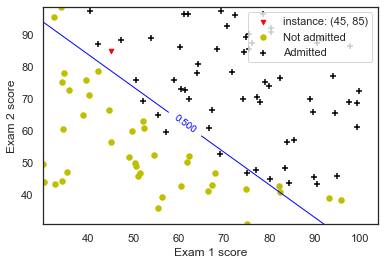

In [9]:
# draw

plt.scatter(45, 85, s=20, c='r', marker='v', label='instance: (45, 85)')
plt.scatter(data[neg][:,0], data[neg][:,1], s=20, c='y', marker='o', linewidths=2, label='Not admitted')
plt.scatter(data[pos][:,0], data[pos][:,1], s=30, c='k', marker='+', linewidths=2, label='Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc=1);

# 选取首尾两点
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()

# 在指定的间隔内返回均匀间隔的数字

# [X,Y] = meshgrid(x,y) 基于向量 x 和 y 中包含的坐标返回二维网格坐标。
# X 是一个矩阵，每一行是 x 的一个副本；Y 也是一个矩阵，每一列是 y 的一个副本。
# 坐标 X 和 Y 表示的网格有 length(y) 个行和 length(x) 个列。

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# 在指定的间隔内返回均匀间隔的数字。
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = getSigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(result.x))
h = h.reshape(xx1.shape)

# Z的形状是跟x, y的数量有关[y, x].
b = plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')
# b = plt.contour(xx1, xx2, h, 1, linewidths=1, colors='b') 上面是现实那一条线，这是显示几条等高线。
plt.clabel(b, inline=True, fontsize=10)

In [10]:
# 1.2.4 Evaluating logistic regression

# p = PREDICT(theta, X) computes the predictions for X using a 
# threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

m = y.size
p = getSigmoid(X.dot(result.x.T)) >= 0.5
predict = p.astype(np.int)
print('Train accuracy {}%'.format(100 * sum(predict == y.ravel()) / predict.size))

Train accuracy 89.0%
